# Exercise 2

In this exercise it was asked to use different methods to implement varius discreet distribitions by sampling a uniform distribution.

Excercise 2

Discrete random variables
In the excercise you can use a build in procedure for generating
random numbers. Compare the results obtained in simulations with
expected results. Use histograms (and tests).
1. Choose a value for the probability parameter p in the geometric
distribution and simulate 10,000 outcomes. You can experiment
with a small, moderate and large value if you like.
2. Simulate the 6 point distribution with

    X 1 2 3 4 5 6

    pi 7/48 5/48 1/8 1/16 1/4 5/16

     (a) by applying a direct (crude) method 

     (b) by using the rejction method

     (c) by using the Alias method

3. Compare the three different methods using adequate criteria,
then discuss the results.
4. Give recommendations of how to choose the best suited
method in different settings, i.e., discuss the advantages and
drawbacks of each method. If time permits substantiate by
running experiments.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import floor
from scipy import stats
import time

In [3]:
def random_num (n,x_0,a,c,m): 
    random_number = []
    for i in range(n):
        x_i = (x_0 * a + c)%m
        x_0 = x_i
        random_number.append(x_i/m)
    return random_number

In [4]:
U = random_num (10000,9,1111,113,2**24)

In [5]:
#![image.png](attachment:image.png)

## Part 1 

In this part it was askedit was asked to use the analytic expression of of the crude method to compute the geometric distribution. More specifically to each sampled value of the sample that we get from the uniform distribution we apply the expression $X=\lfloor \frac{log(U)}{log(1-p)}\rfloor+1$

In [6]:
def geometric_distrubution(random_number,p):
    geom = [np.ceil(np.log(1-x) / np.log(1-p)) for x in random_number]
    return geom

Initially we have compared the means of the our impelentation and unmpy implementation for $p = [0.02\; ,\; 0.2\; ,\;0.4]$

In [7]:
np.mean(geometric_distrubution(U,0.02)), np.mean(np.random.geometric(p=0.02, size=10000))

(50.3121, 49.5838)

In [8]:
np.mean(geometric_distrubution(U,0.2)), np.mean(np.random.geometric(p=0.2, size=10000))

(5.0267, 4.991)

In [9]:
np.mean(geometric_distrubution(U,0.4)), np.mean(np.random.geometric(p=0.4, size=10000))

(2.5079, 2.4906)

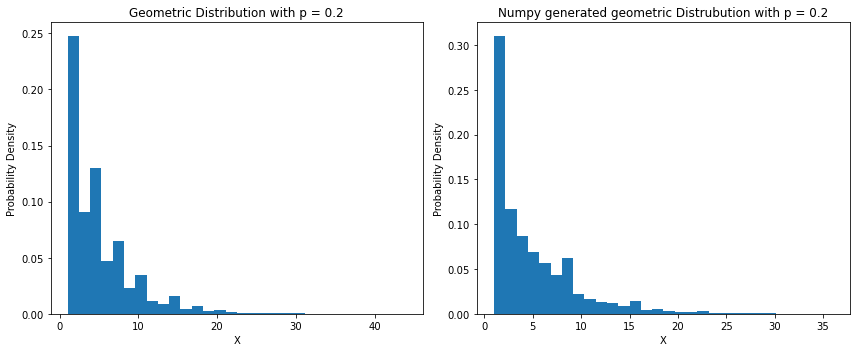

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
titles = ['Geometric Distribution with p = 0.2', 'Numpy generated geometric Distrubution with p = 0.2']
axes[0].hist(geometric_distrubution(U,0.2), bins=30, density=True)
axes[0].set_title(titles[0])
axes[0].set_ylabel('Probability Density')
axes[0].set_xlabel('X')
axes[1].hist(np.random.geometric(p=0.2, size=10000), bins=30, density=True)
axes[1].set_title(titles[1])
axes[1].set_ylabel('Probability Density')
axes[1].set_xlabel('X')

plt.tight_layout()
plt.show()

Also the diagrams even thought they are not the same they ar close enough

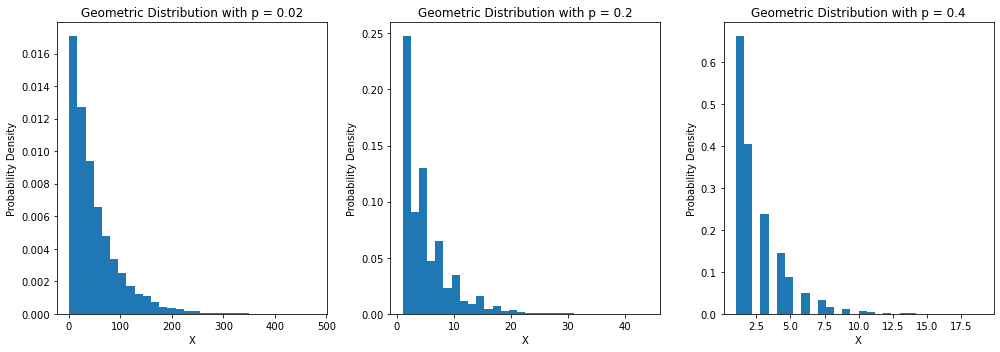

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))
p_values = [0.02, 0.2, 0.4]
titles = ['Geometric Distribution with p = 0.02', 'Geometric Distribution with p = 0.2', 'Geometric Distribution with p = 0.4']

for i, p in enumerate(p_values):
    X = geometric_distrubution(U, p)
    axes[i].hist(X, bins=30, density=True)
    axes[i].set_title(titles[i])
    axes[i].set_ylabel('Probability Density')
    axes[i].set_xlabel('X')

plt.tight_layout()
plt.show()

# Our Coments:

From our experiment, we observed that our custom geometric function generated distributions consistently had slightly higher means compared to the geometric distributions generated by the built-in function for different values of p. For p values of 0.02, 0.2, and 0.4, we obtained mean values of 50.3121, 5.0267, and 2.5079, respectively, for our geometric distributions.

Analyzing the histograms above, we can observe that lower values of p result in smoother histograms.

# Part 2

In thes part we have been asked to use three different methods to create the distribution. $p = [7/48, 5/48, 1/8, 1/16, 1/4,5/16]$

In [18]:
### given probability
p = [7/48, 5/48, 1/8, 1/16, 1/4,5/16]
PP = np.cumsum(p)

# a) Crude method

In the crude method we get the cummpulative distribution for the different categories and we use a sample $\sim uniform[0,1]$. then the each element of the sample is converted to the category that has cumulative propadility slightly bigger than that element following the expression $X=x_i \;if\; F(x_{i+1})<U\leq F(x_i) $ 

In [19]:
u = np.random.uniform(0,1,10000)

In [20]:
def catagoty(s,pp):
    if(s <= pp[0]): return 1
    elif(s <= pp[1]): return 2
    elif(s <= pp[2]): return 3
    elif(s <= pp[3]): return 4
    elif(s <= pp[4]): return 5
    else: return 6   

In [21]:
def crude_method(u):
    x = []
    for i in u:
        x.append(catagoty(i,PP))
    return x


# b) Rejection method

In the rejection method we we run iterations to create each element of the sample. 
In each iteration We create a n $I$ by sampling from a uniform distribution between $[0,1]$ and multiplying by the number of the distinct values.
Then we toss an unfair coin buy using a second uniform distribution between $[0,1]$ and accepting with probability $p = p_I/c\; where \; c \geq p_i \;\forall\; i$

In [25]:
def rejection_method(pp,sample_size=10000):
    k = len(pp)
    c = max(pp)
    sample = []
    while len(sample) < sample_size:
        while(True):
            U1 = np.random.uniform(0,1,1)[0]
            U2 = np.random.uniform(0,1,1)[0]
            I=floor(U1*k)
            if (U2<=(pp[I])/c):
                sample.append(I)
                break
        x = []
    for i in u:
        x.append(catagoty(i,PP))
    return x
    return sample
        

# c) Alias method

At the Alias method what we do is that for each category we create an alias $A[I]$ and a number between 0 and 1 $F[I]$.
Then in order to create the sample in each iteration we create an $I$ by sampling from a uniform distribution and then we toss again an unfair coin which we accept I with propabity $F(I)$ the $I$ other wise we get instead $A(I)$

In [29]:
def setup(p):
    L = [i for i in range(len(p))]
    F = [i*len(p) for i in p]
    G = [i for i in range(len(p)) if F[i]>=1]
    S = [i for i in range(len(p)) if F[i]<1]
    while(len(S)>0):
        i=G[0]
        j=S[0]
        L[j] = i
        F[i] = F[i]-(1-F[j])
        if (F[i]<1-1e-8):
            G.pop(0) #G = G[1:]
            S.append(i)
        S.pop(0)
    return (F,L)
            


In [30]:
def alias_method(p, sample_size=10000):
    F ,L = setup(p)
    sample = []
    for i in range(sample_size):
        I = floor(len(p)*np.random.uniform(0,1,1)[0])
        if (np.random.uniform(0,1,1)[0]<= F[I]):
            sample.append(I)
        else:
            sample.append(L[I])
    return sample


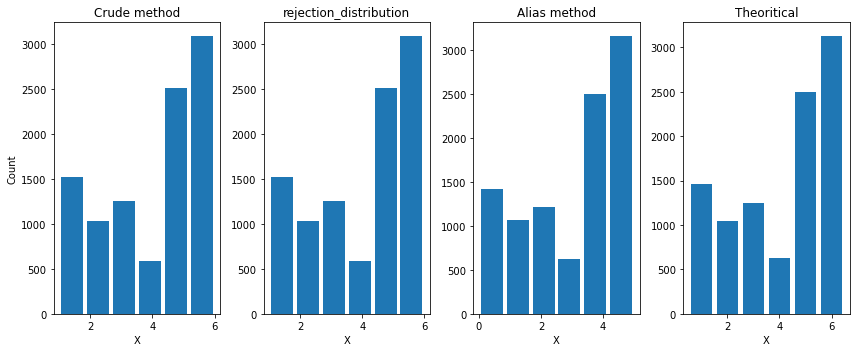

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 5))
titles = ['Crude method', 'rejection_distribution','Alias method','Theoritical']

axes[0].hist(crude_method(u),bins =6,rwidth=0.85)
axes[0].set_title(titles[0])
axes[0].set_ylabel('Count')
axes[0].set_xlabel('X')

axes[1].hist(rejection_method(u), bins=6,rwidth=0.85)
axes[1].set_title(titles[1])
axes[1].set_xlabel('X')

axes[2].hist(alias_method(p),bins =6,rwidth=0.85)
axes[2].set_title(titles[2])
axes[2].set_xlabel('X')

axes[3].bar([1,2,3,4,5,6],[i*10000 for i in p])
axes[3].set_title(titles[3])
axes[3].set_xlabel('X')

plt.tight_layout()
plt.show()

# 3 Comparison the three methods:

Based on the above diagramms the three implementations give the same results that are very close to the theoretical distribution which we get if we multiply each probability with 10000. However the rejacrion method has a loop which we do not know when it will end therefore we expect that it will have a higher running time compated to the other two.

In [37]:
start_time = time.time()
u = np.random.uniform(0,1,10000)
crude_method(u)
end_time = time.time()
print("Time taken by Crude method:",end_time-start_time)
start_time = time.time()
u = np.random.uniform(0,1,10000)
rejection_method(u)
end_time = time.time()
print("Time taken by rejection Method:",end_time-start_time)
start_time = time.time()
u = np.random.uniform(0,1,10000)
alias_method(u)
end_time = time.time()
print("Time taken by alias method:",end_time-start_time)


Time taken by Crude method: 0.01599860191345215
Time taken by rejection Method: 0.34189820289611816
Time taken by alias method: 0.17654871940612793


Time taken by Crude method: 0.01599860191345215 
<br>
Time taken by rejection Method: 0.34189820289611816
<br>
Time taken by alias method: 0.17654871940612793
<br>

# Our coments:

When we performed our sampling using three methods, we observed that the rejection method took the longest time, with a duration of 0.13438105583190918. The alias method followed with a time of 0.10035109519958496, and the Crude method had the shortest duration of 0.007367610931396484. This ordering is reasonable since the rejection method requires more computational steps compared to the other methods. However, it is simpler that the alias method. and it does not demand precomputed arrays.

## Part 3

The crude method created fast a big sample however it should not be that good in a situation that we need only one resul, like in an online system. 
<br>
The rejection method on the other hand can run in an online context but it is not benefitial to use it in order to create a big sample because it is slow.
<br>
Finally, the allias method is fast enough to be able to produce both sinlge values and big samples. However, it is not clear if it can be useful in situations that we cannoe hace precomputed tables.